In [1]:
import matplotlib.pyplot as plt
from skimage import io, filters, util, restoration, morphology, exposure
import os
import numpy as np

In [2]:
DATA_DIR = r'D:\Researchdata\ZY1'

In [3]:
for parent, dir, file in os.walk(DATA_DIR):
    if( 'tiff' in parent):
        for f in file:
            raw_stack = io.imread(os.path.join(parent, f))
            

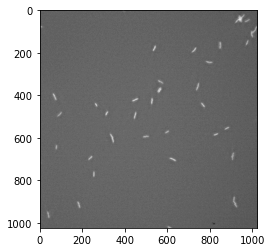

In [4]:
img_raw = raw_stack[0, ..., 2]
img_sharp = filters.unsharp_mask(img_raw, radius = 10, amount = 2, preserve_range = False)
img_sharp = util.img_as_uint(img_sharp)
plt.imshow(img_sharp, cmap = 'gray')

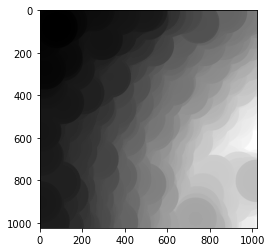

In [5]:
background = restoration.rolling_ball(img_sharp, radius = 100)
plt.imshow(background, cmap = 'gray')

C:\Users\littl\anaconda3\envs\pilus\lib\site-packages\skimage\filters\rank\generic.py:264: UserWarning: Bad rank filter performance is expected due to a large number of bins (13371), equivalent to an approximate bitdepth of 13.7.
  image, selem, out, mask, n_bins = _preprocess_input(image, selem,


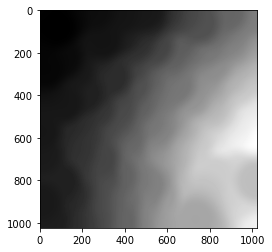

In [6]:
background_normal = filters.rank.mean(background, selem = morphology.disk(30))
plt.imshow(background_normal, cmap = 'gray')

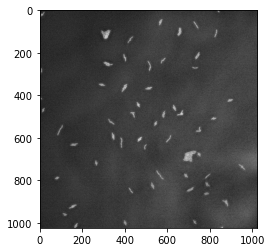

In [7]:
img_bg_reduced = img_sharp - background_normal
img_bg_reduced[img_sharp < background_normal] = 0
# img_bg_reduced[img_bg_reduced <0 ] = 0
img_bg_reduced = exposure.rescale_intensity(img_bg_reduced, out_range = (np.min(img_sharp), np.max(img_sharp)))
# img_bg_reduced = (img_bg_reduced.astype(np.int16))
plt.imshow(img_bg_reduced, cmap = 'gray')
# plt.hist(img_bg_reduced.ravel(), bins=255)

(array([1.6000e+01, 4.0000e+00, 9.0000e+00, 6.0000e+00, 1.3000e+01,
        1.6000e+01, 2.7000e+01, 3.6000e+01, 3.3000e+01, 4.8000e+01,
        7.7000e+01, 9.5000e+01, 1.3800e+02, 2.0400e+02, 1.8700e+02,
        2.9600e+02, 3.4000e+02, 4.5200e+02, 5.6200e+02, 7.1900e+02,
        7.9400e+02, 1.0340e+03, 1.2420e+03, 1.5660e+03, 1.7500e+03,
        2.0540e+03, 2.5630e+03, 2.8630e+03, 3.5800e+03, 4.0330e+03,
        4.6710e+03, 5.2810e+03, 6.1600e+03, 6.8970e+03, 7.7870e+03,
        8.4110e+03, 9.2130e+03, 1.0464e+04, 1.1334e+04, 1.2609e+04,
        1.3275e+04, 1.4650e+04, 1.5333e+04, 1.6750e+04, 1.7154e+04,
        1.8571e+04, 1.9114e+04, 2.0433e+04, 2.0787e+04, 2.1547e+04,
        2.2991e+04, 2.2933e+04, 2.4006e+04, 2.3923e+04, 2.4821e+04,
        2.4329e+04, 2.5252e+04, 2.4645e+04, 2.5321e+04, 2.4733e+04,
        2.4742e+04, 2.4905e+04, 2.3959e+04, 2.4150e+04, 2.2959e+04,
        2.3083e+04, 2.1731e+04, 2.1942e+04, 2.0883e+04, 2.0281e+04,
        1.9148e+04, 1.8946e+04, 1.7560e+04, 1.68

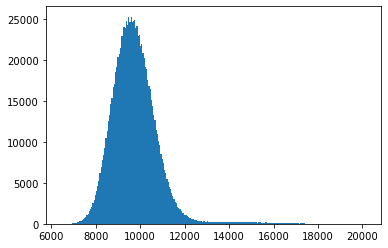

In [8]:
plt.hist(img_bg_reduced.ravel(), bins = 255)

In [9]:
thresholds = filters.threshold_multiotsu(img_sharp, classes = 4)

In [ ]:

# Using the threshold values, we generate the three regions.
regions = np.digitize(img_bg_reduced, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img_bg_reduced, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img_bg_reduced.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()
print(thresholds)
thresh = [thr for thr in thresholds if thr > 10][0]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

In [ ]:
temp = util.img_as_uint(img_bg_reduced)